In [71]:
#Importing packages
import seaborn as sns
import numpyro.distributions as dist
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from jax import random

rng_key = random.PRNGKey(3)
rng_key, rng_key_ = random.split(rng_key)

Log-Normal Distribution: \
 Typically parameterised by 3 parameters:
 - $\theta$ : location parameter
 - $m$ : scale parameter
 - $\sigma$ : shape parameter (also stddev of the log of the distribution)
$$f(x)=\dfrac{1}{(x-\theta)\sigma {\sqrt {2\pi }}} e^ {\left( -\dfrac {(\ln ((x-\theta)/m))^2}{2\sigma ^{2}}\right)}$$

 In Numpyro they use the 2 parameter log normal with $\mu$ and $\sigma$ where:
 $\mu=log(m)$ and $\theta=0$.
$$f(x)=\dfrac{1}{x\sigma {\sqrt {2\pi }}} e^ {\left( -\dfrac {(\ln (x)-\mu)^2}{2\sigma ^{2}}\right)}$$
In Scipy they use the 3 parameter log normal with $s=\sigma$, $loc=\theta$ and $scale=m$.

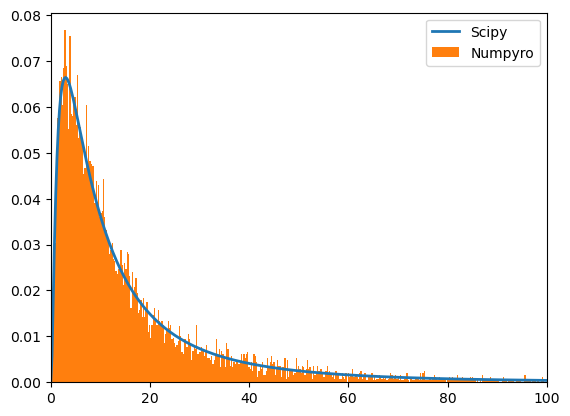

In [72]:
fig, ax = plt.subplots()
xs = np.linspace(0.01,100,400)
theta = 0 
m = 10.0
sigma = 1.1
scipy_loc = theta 
scipy_scale = m 
numpyro_loc = np.log(m)
numpyro_scale = sigma

ys = lognorm.pdf(xs, sigma, scipy_loc, scipy_scale)
ax.plot(xs, ys, lw=2, label='Scipy')
numpyro_samples = dist.LogNormal(numpyro_loc,numpyro_scale).sample(rng_key,(10000,))
plt.hist(numpyro_samples,density=True, bins=xs,label='Numpyro')
plt.xlim(0,100)
plt.legend()
plt.show()